# 의류 분류 분석

## keras 에서 이미지를 가져옴  
-  keras의 패션 데이터셈플 가져오기
``` python
from tensorflow import keras
keras.datasets.fashion_mnist.load_data()
```




In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


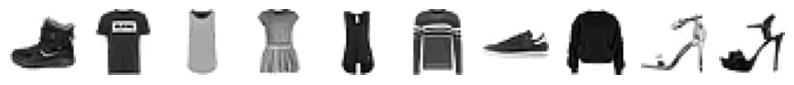

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

# train 데이터 numpy 변환  

numpy에 tarin_target 데이터 넣기

In [7]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


# 로직스트 회계 (Logistic Regression)

데이터를 0 과 1 로 나누어 데이터 분류의 최적의 가중치를 준다  

경사하강법을 이용한다  

$ y = wx + b $  
$ w $ : 가중치  
$ b $ : 위치

### 활성화 함수의 종류
- sigmoid  
   $ \sigma (x) = \frac{1}{1 + e^{-x}} $

- tanh  
  $ \tanh ( x ) $

- ReLU  
- Leaky ReLU
- Maxout
- ELU

[활성화 함수 링크](https://medium.com/@kmkgabia/ml-sigmoid-%EB%8C%80%EC%8B%A0-relu-%EC%83%81%ED%99%A9%EC%97%90-%EB%A7%9E%EB%8A%94-%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-c65f620ad6fd).


In [8]:
import pandas as pd
pd.Series(train_target).value_counts().sort_index()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [9]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [10]:
pd.DataFrame(train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


# sklearn

### 선형 회기 모델 Linear Regression



In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier( loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)


In [12]:
print(scores['test_score'])

[0.83075    0.82025    0.82041667 0.808      0.81858333]


In [13]:
print(np.mean(scores['test_score']))

0.8196000000000001


# sklearn   
# seaborn
데이터 보여주기


In [14]:
from sklearn.metrics import precision_score, f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth =5, random_state=156, n_estimators = 1000)

rf.fit(train_scaled, train_target)
print(rf.score(train_scaled, train_target))

0.7737833333333334


In [15]:
test_scaled = test_input / 255.0
test_scaled = test_scaled.reshape(-1, 28*28)

In [16]:
print(test_scaled.shape)

(10000, 784)


In [17]:
y_pred=rf.predict(test_scaled)
print(classification_report(test_target,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.99      0.85      0.91      1000
           2       0.58      0.69      0.63      1000
           3       0.64      0.89      0.74      1000
           4       0.53      0.75      0.62      1000
           5       0.97      0.84      0.90      1000
           6       0.67      0.07      0.13      1000
           7       0.84      0.90      0.87      1000
           8       0.92      0.92      0.92      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.74     10000
weighted avg       0.78      0.76      0.74     10000



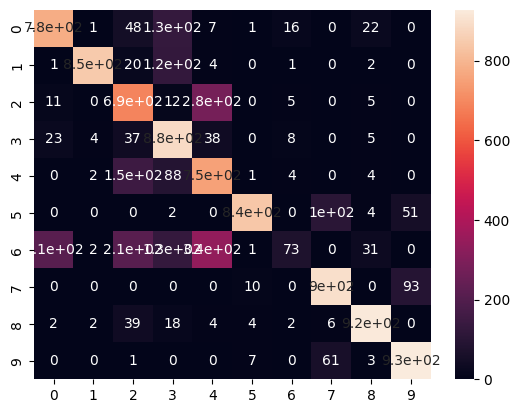

In [18]:
import seaborn as sns
cm = confusion_matrix(test_target,y_pred)
sns.heatmap(cm, annot = True)
plt.show()

# 데이터 라벨링 해주기

random forest 란?  
랜덤하게 데이터를 가져오고 그것을 모델링을 만들어 테스트 데이터와 비교해보며 모델을 완성 시킨다

[RandomForest 링크](https://inuplace.tistory.com/570)

In [19]:
from sklearn.metrics import precision_score, f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth =5, random_state=156, n_estimators = 1000)

rf.fit(train_scaled, train_target)
print(rf.score(train_scaled, train_target))

0.7737833333333334


# 인공신경망  
Desen : 레이어의 모델 1계층을 정한다  
Sequential : 레이어층을 쌓는다

[sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy) 란?

In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42, stratify = train_target)

In [23]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [24]:
pd.Series(val_target).value_counts()

5    1200
4    1200
2    1200
1    1200
0    1200
3    1200
6    1200
8    1200
9    1200
7    1200
dtype: int64

In [25]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [26]:
model = keras.Sequential(dense)

In [27]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [28]:
print(train_target[:10])

[6 6 3 3 0 5 9 3 6 1]


# 모델 만들기  
- 이전 설정을 따라서 모델을 만들어 본다


In [29]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 10s 3ms/step - loss: 0.6102 - accuracy: 0.7918
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4795 - accuracy: 0.8372
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4542 - accuracy: 0.8452
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4419 - accuracy: 0.8503
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4343 - accuracy: 0.8531


In [30]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4242 - accuracy: 0.8523


[0.42419347167015076, 0.8523333072662354]

반대로 테스트


In [31]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.4769 - accuracy: 0.8369


[0.47690001130104065, 0.836899995803833]

# 심층 신경망

이러한 모델들을 곂처서 많이 사용해본다


In [32]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [33]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [34]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42, stratify = train_target)

In [35]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [36]:
model = keras.Sequential([dense1, dense2])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [39]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5707 - accuracy: 0.8051
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4131 - accuracy: 0.8512
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3772 - accuracy: 0.8634
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3552 - accuracy: 0.8712
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3385 - accuracy: 0.8773


In [43]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [45]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42, stratify = train_target )

In [46]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5326 - accuracy: 0.8125
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3958 - accuracy: 0.8568
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3598 - accuracy: 0.8709
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3375 - accuracy: 0.8777
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3226 - accuracy: 0.8846


# 옵티마이져

최적의 w가중지를 설정하기 위하여 w가중치 증가 감소 량을 조절한다

## 옵티마이져 설정에 관하여
[옵티마이져 링크](https://onevision.tistory.com/entry/Optimizer-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%ED%8A%B9%EC%84%B1-Momentum-RMSProp-Adam)


In [47]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [48]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [49]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [50]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [51]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [52]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [53]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # 입력층+flatten
model.add(keras.layers.Dense(100, activation='relu')) # 은닉층
model.add(keras.layers.Dense(10, activation='softmax')) #출력층

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5309 - accuracy: 0.8140
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3960 - accuracy: 0.8584
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3560 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3270 - accuracy: 0.8803
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3124 - accuracy: 0.8858


In [55]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8844


[0.3318778872489929, 0.8844166398048401]